In [1]:
__author__ = 'Stephanie Juneau <stephanie.juneau@noirlab.edu>'
__version__ = '20240606' # yyyymmdd
__datasets__ = ['unwise_dr1', 'allwise']
__keywords__ = ['science example', 'plot:cmd', 'plot:histogram']

# Mid-Infrared Photometry from unWISE DR1 & AllWISE

*Stéphanie Juneau (NOIRLab), Eddie Schlafly (LBNL), Aaron Meisner (NOIRLab) & the Astro Data Lab Team*

### Table of contents
* [Goals](#goals)
* [Disclaimer & Attribution](#attribution)
* [Introduction](#intro)
* [Imports & setup](#import)
* [Chapter 1: Queries to unWISE & AllWISE](#chapter1)
* [Chapter 2: Color & Magnitude Distributions](#chapter2)
* [Chapter 3: Color-Magnitude Diagrams of AllWISE & unWISE DR1](#chapter3)
* [Chapter 4: Plot location of query results in Galactic Coordinates](#chapter4)
* [Resources and references](#resources)

<a class="anchor" id="goals"></a>
# Goals
Compare the photometry (e.g., magnitude and color distributions) of the recent unWISE catalog ([Schlafly et al 2019](https://ui.adsabs.harvard.edu/abs/2019ApJS..240...30S)) to the original AllWISE catalog ([Wright et al 2010](https://ui.adsabs.harvard.edu/abs/2010AJ....140.1868W)) taking advantage of the unWISE DR1 and AllWISE databases at the Astro Data Lab. 

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

<a class="anchor" id="intro"></a>
# Introduction

The unWISE catalog reaches deeper than the original All-WISE catalog thanks to including significantly deeper imaging, and to the use of improved modeling of crowded regions (Schlafly et al 2019). The new data correspond to an increase in exposure time by a factor of five (Figure 1).

<figure>
<img src="Figs/unWISE_Schlafly_fig2.jpeg", align="center", width=600>
<figcaption><b>Figure 1.</b> Figure from Schlafly et al (2019; their Figure 2) showing "AllWISE and unWISE compared with much deeper, higher resolution imaging from Spitzer–COSMOS, for a small portion of the COSMOS field. The three rows show 3.4 μm imaging of the same small patch of high-latitude sky from AllWISE (top), unWISE (middle), and Spitzer–COSMOS (right, 3.6 μm). The left column shows only the images, while the right column overplots the 5σ catalog entries from AllWISE (top) and unWISE (middle, bottom). The deeper unWISE stacks clearly allow many more sources to be detected, and the crowdsource catalog describes these well. Nevertheless, comparison with the Spitzer imaging reveals clear examples of unidentified sources (for instance, near (503, 1518)) and resolved sources that are split into multiple point sources (for instance, near (530, 1526)). Axis units are WISE pixels on coadd_id 1497p015."</figcaption>
</figure>



<a class="anchor" id="import"></a>
# Imports and setup

In [2]:
# 3rd party # remove imports that are not needed
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

# Data Lab
from dl import queryClient as qc, storeClient as sc
from dl.helpers.utils import convert

# Learn about unWISE 'object' table
The command below will print the list of column names and descriptions.

In [3]:
#print(qc.schema('unwise_dr1.object'))

Below is an query from the *GettingStartedWithDataLab* notebook to quickly retrieve useful stats from the **tbl_stat** table.

In [4]:
#Retrieve useful stats, quickly
query="SELECT * FROM tbl_stat WHERE schema='unwise_dr1' and tbl_name='object'"

In [5]:
%time
info = qc.query(sql=query) # by default the result is a CSV formatted string

CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 13.8 µs


In [6]:
print(info)  #NOTE: because unWISE is a foreign data table, it may not show up correctly in tbl_stat (in progress)

schema,tbl_name,nrows,ncols,nindex,table_size,indexes_size,total_size
unwise_dr1,object,2214734336,60,14,789136891904,579894181888,1369031073792



# Learn about AllWISE 'source' table
The command below will print the list of column names and descriptions, which is also available on the web interface: https://datalab.noirlab.edu/query.php?name=allwise.source

In [7]:
#print(qc.schema('allwise.source'))

In [8]:
#Retrieve useful stats, quickly
query="SELECT * FROM tbl_stat WHERE schema='allwise' and tbl_name='source'"

In [9]:
%time
info = qc.query(sql=query) # by default the result is a CSV formatted string

CPU times: user 4 µs, sys: 6 µs, total: 10 µs
Wall time: 19.8 µs


In [10]:
print(info)

schema,tbl_name,nrows,ncols,nindex,table_size,indexes_size,total_size
allwise,source,747634048,100,15,386859048960,197738676224,584597725184



<a class="anchor" id="chapter1"></a>
# Chapter 1 - Queries to unWISE & AllWISE

## Query the unWISE 'object' table

In [11]:
query = """
        SELECT mag_w1_vg as w1, mag_w2_vg as w2, w1_w2_vg as w1_w2, 
               flux_w1/dflux_w1 as snr1, flux_w2/dflux_w2 as snr2, 
               ra, dec, glon, glat, spread_model_w1, dspread_model_w1 
        FROM unwise_dr1.object 
        WHERE (mag_w1_vg < 20 and mag_w2_vg < 20 and flux_w1/dflux_w1>5 and flux_w2/dflux_w2>5 and glat>50 and glat<60 and random_id>20 and random_id<21) 
        LIMIT 500000"""
print(query)

# Notes on the query:
# - S/N cuts in W1 & W2: flux_w1/dflux_w1>5 and flux_w2/dflux_w2>5
# - galactic latitude (glat) cuts in order to restrict to same part of sky for unWISE and allWISE
# - random_id cut to select randomly over the sky (besides the glat condition)
# 
# - To select on magnitudes instead:
#        WHERE (mag_w1_vg < 20 and mag_w2_vg < 20 and glat>50 and glat<60 and random_id>20 and random_id<21)
#


        SELECT mag_w1_vg as w1, mag_w2_vg as w2, w1_w2_vg as w1_w2, 
               flux_w1/dflux_w1 as snr1, flux_w2/dflux_w2 as snr2, 
               ra, dec, glon, glat, spread_model_w1, dspread_model_w1 
        FROM unwise_dr1.object 
        WHERE (mag_w1_vg < 20 and mag_w2_vg < 20 and flux_w1/dflux_w1>5 and flux_w2/dflux_w2>5 and glat>50 and glat<60 and random_id>20 and random_id<21) 
        LIMIT 500000


In [12]:
try:
    result = qc.query(sql=query,timeout=600) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

CPU times: user 528 ms, sys: 337 ms, total: 865 ms
Wall time: 27.2 s


In [13]:
# Convert the result to a Pandas Dataframe
df = convert(result,'pandas',na_values=('NaN','Infinity'))

In [14]:
# Print a few rows of the dataframe
print(df[:5])
len(df)

          w1         w2     w1_w2       snr1      snr2          ra        dec  \
0  17.511545  17.070599  0.440947  20.371399  8.016321  237.255484  47.381982   
1  18.165625  17.162722  1.002903  11.419026  7.335530  237.203214  47.453391   
2  17.535522  16.937910  0.597612  20.047981  8.999524  237.115025  47.433199   
3  17.333075  16.868095  0.464979  23.905336  9.632591  237.043170  47.420165   
4  17.154850  16.936937  0.217913  28.196568  9.324523  236.962291  47.573064   

        glon       glat  spread_model_w1  dspread_model_w1  
0  75.447776  50.008021         0.000917          0.001843  
1  75.569108  50.024508        -0.006829          0.003268  
2  75.561926  50.087308         0.003994          0.001885  
3  75.561312  50.137636        -0.004168          0.001590  
4  75.813734  50.151655         0.001754          0.001340  


294368

## Query the AllWISE 'source' table

In [15]:
query = """
        SELECT w1mpro as w1, w2mpro as w2, w1snr, w2snr,
               ra, dec, glon, glat, random_id, ph_qual
        FROM allwise.source
        WHERE (w1snr>5 and w2snr>5 and glat>50 and glat<60 and random_id > 20 and random_id < 21)
        LIMIT 500000"""
print(query)
#
# w1(2)snr = w1(2) signal-to-noise ratio
# ph_qual  = photometric quality flag
#


        SELECT w1mpro as w1, w2mpro as w2, w1snr, w2snr,
               ra, dec, glon, glat, random_id, ph_qual
        FROM allwise.source
        WHERE (w1snr>5 and w2snr>5 and glat>50 and glat<60 and random_id > 20 and random_id < 21)
        LIMIT 500000


In [16]:
try:
    result_all = qc.query(sql=query,timeout=600) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

CPU times: user 171 ms, sys: 66.5 ms, total: 237 ms
Wall time: 9.51 s


In [17]:
# Convert the result to a Pandas Dataframe
df_all = convert(result_all,'pandas',na_values=('NaN','Infinity'))

In [18]:
# Print a few rows of the dataframe
print(df_all[:5])
len(df_all)

       w1      w2  w1snr  w2snr          ra        dec       glon       glat  \
0  16.142  16.025   26.1   11.4  237.208463  47.520862  75.669312  50.004248   
1  17.010  16.567   16.3    7.0  237.187766  47.474888  75.605514  50.029319   
2  10.046  10.110   47.9   53.1  237.175725  47.448467  75.568863  50.043818   
3  16.464  16.310   22.7    8.5  237.124184  47.474841  75.622250  50.070930   
4  16.991  16.818   17.0    5.9  237.058131  47.458978  75.615860  50.118139   

   random_id ph_qual  
0  20.015484    AAUU  
1  20.550955    ABUU  
2  20.846630    AAAU  
3  20.223392    ABBU  
4  20.712626    ABUU  


124764

### NOTE:
We can already see from the query results above that there are more objects in unWISE with S/N>5 in both W1 & W2 (N=294,368) relative to AllWISE (N=124,764).

<a class="anchor" id="chapter2"></a>
# Chapter 2 - Color & Magnitude Distributions

For reference, we will compate with the distributions of *W1-W2* color and *W1* magnitude from the cross-matched AllWISE-SDSS DR10 sample from the work of [Kurcz et al (2016)](https://ui.adsabs.harvard.edu/abs/2016A%26A...592A..25K). Below, we will create distributions from our query results.

## Color Distributions for AllWISE & unWISE DR1

In [19]:
magthres = 16. #magnitude threshold to investigate bright (<16) vs. faint (>16)
colthres = 0.1 #color threshold in W1-W2 between blue and red for plotting below

# AllWISE (suffix "_all")
faint_w1_all  = df_all['w1']>magthres
bright_w1_all = df_all['w1']<=magthres
w1_w2_all = df_all['w1'] - df_all['w2']
blue_all  = w1_w2_all<=colthres
red_all   = w1_w2_all>colthres

# unWISE
faint_w1  = df['w1']>magthres
bright_w1 = df['w1']<=magthres
blue = df['w1_w2']<=colthres
red  = df['w1_w2']>colthres

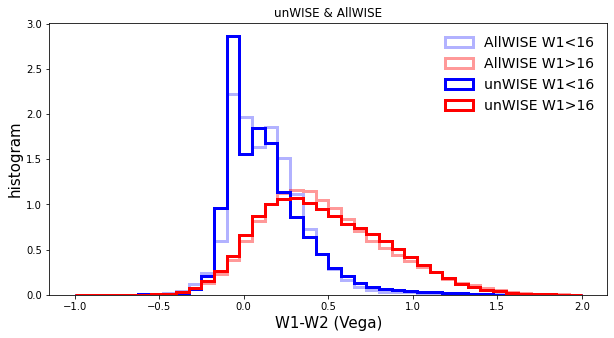

In [20]:
#W1-W2 Color distribution
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(w1_w2_all[bright_w1_all],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Blue',alpha=0.3,label='AllWISE W1<16')
ax.hist(w1_w2_all[faint_w1_all],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Red',alpha=0.4,label='AllWISE W1>16')
ax.set_xlabel('W1-W2 (Vega)',fontsize=15)
ax.set_ylabel('histogram',fontsize=15)
ax.set_title('unWISE & AllWISE')
ax.hist(df['w1_w2'][bright_w1],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Blue',alpha=1,label='unWISE W1<16')
ax.hist(df['w1_w2'][faint_w1],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Red',alpha=1,label='unWISE W1>16')

ax.legend(loc='upper right',frameon=False,fontsize=14)
plt.show()

We can see from the Figure above that the color distributions are similar between AllWISE (light color histograms) and unWISE (darker color histograms) for both the *bright* (`W1<16`, in blue) and *faint* (`W1>16`, in red) objects in the tables.

## Color Distribution from AllWISE-SDSS DR10 Sample

<figure>
<img src="Figs/Kurcz2016_fig2.png", align="center", width=600>
</figure>
For comparison, the figure above shows the distributions of W1-W2 color in Vega magnitudes from
Kurcz et al (2016) (their Figure 2). Above, the objects are separated according to their SDSS DR10 spectral classification into stars (green), galaxies (blue), and quasars (red).

Comparing both figures suggests that the objects in the unWISE and AllWISE *bright* and *faint* distributions include a mixture of stars, galaxies and quasars, though the quasars are mostly found in the fainter objects (>16), for which the histograms reach redder `W1-W2` colors (>0.5).

## Magnitude Distributions for AllWISE & unWISE DR1

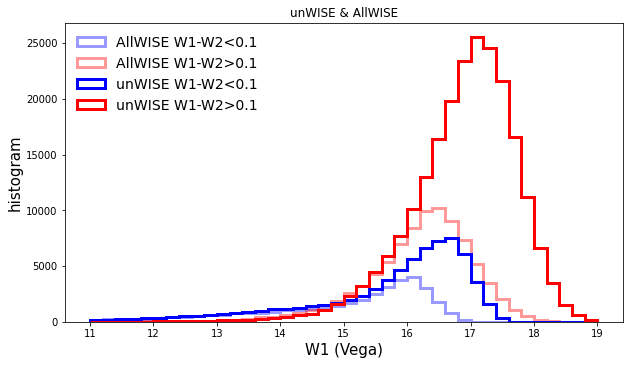

In [21]:
#W1 magnitude distributions (split into blue and red W1-W2) 
fig, ax = plt.subplots(figsize=(10,5.5))
ax.hist(df_all['w1'][blue_all],bins=40,density=False,range=(11,19),histtype='step',lw=3,color='Blue',alpha=0.4,label='AllWISE W1-W2<0.1')
ax.hist(df_all['w1'][red_all],bins=40,density=False,range=(11,19),histtype='step',lw=3,color='Red',alpha=0.4,label='AllWISE W1-W2>0.1')
ax.set_xlabel('W1 (Vega)',fontsize=15)
ax.set_ylabel('histogram',fontsize=15)
ax.set_title('unWISE & AllWISE')
ax.hist(df['w1'][blue],bins=40,density=False,range=(11,19),histtype='step',lw=3,color='Blue',alpha=1,label='unWISE W1-W2<0.1')
ax.hist(df['w1'][red],bins=40,density=False,range=(11,19),histtype='step',lw=3,color='Red',alpha=1,label='unWISE W1-W2>0.1')

ax.legend(loc='upper left',frameon=False,fontsize=14)
plt.show()

The figure above shows a comparison between the AllWISE (light colored histograms) and unWISE (dark colored histograms) magnitude distributions split between blue WISE colors (`W1-W2`<0.1, in blue) and red colors (`W1-W2`>0.1, in red). The histograms are *not* normalized so that we can also compare the absolute number of objects. This makes it obvious that the unWISE table contains many more fainter objects, and that both tables include a larger proportion of red objects relative to blue objects.

## Magnitude Distributions from AllWISE-SDSS DR10 Sample

<figure>
<img src="Figs/Kurcz2016_fig3.png", align="center", width=700>
<figcaption>Figure from Kurcz et al (2016; their Figure 3). The selection function above involves the SDSS optical selection for the main galaxy sample, which may be responsible to produce a sharp magnitude cutoff in W1 photometry for that class of objects.</figcaption>
</figure>

<a class="anchor" id="chapter3"></a>
# Chapter 3 - Color-Magnitude Diagrams of AllWISE & unWISE DR1

## Color-Magnitude Diagram: Scatter Plots 

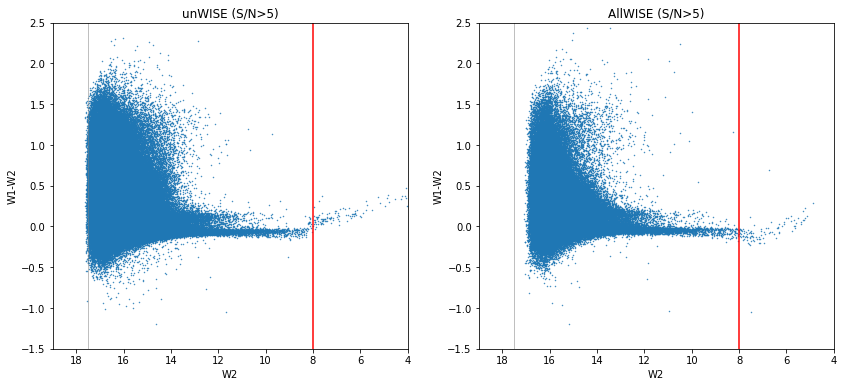

In [22]:
# define a 2-panel figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

#first panel
x = df['w2']
y = df['w1_w2']
ax1.scatter(x,y,0.2)
ax1.set_xlabel('W2')
ax1.set_ylabel('W1-W2')
ax1.set_xlim((19,4))
ax1.set_ylim((-1.5,2.5))
ax1.set_title('unWISE (S/N>5)')

#Saturation at around 8 mag (would give unusual colors/mags)
ax1.axvline(x=8,color='Red')
ax1.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

#second panel
xx = df_all['w2']
yy = w1_w2_all
ax2.scatter(xx,yy,0.2)
ax2.set_xlabel('W2')
ax2.set_ylabel('W1-W2')
ax2.set_xlim((19,4))
ax2.set_ylim((-1.5,2.5))
ax2.set_title('AllWISE (S/N>5)')

#Saturation at around 8 mag (would give unusual colors/mags)
ax2.axvline(x=8,color='Red')
ax2.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

plt.show()

The figure above shows scatter plots of the color-magnitude distributions for unWISE (left-hand panel) and AllWISE (right-hand panel). The vertical gray line is fixed at `W2=17.5`, which is close to the detection limit of unWISE (with S/N>5). The red vertical line at `W2=8` marks the approximate magnitude where objects become saturated, which can yield unreliable magnitudes and colors brighter than this point. There are similarities between the two bivariate distributions such as the horizontal features around `W1-W2=-0.1` & `0.1`, and a significant broadening of the color distribution for objects fainter than `W2=14`.

## Color-Magnitude Diagram: 2D Histograms

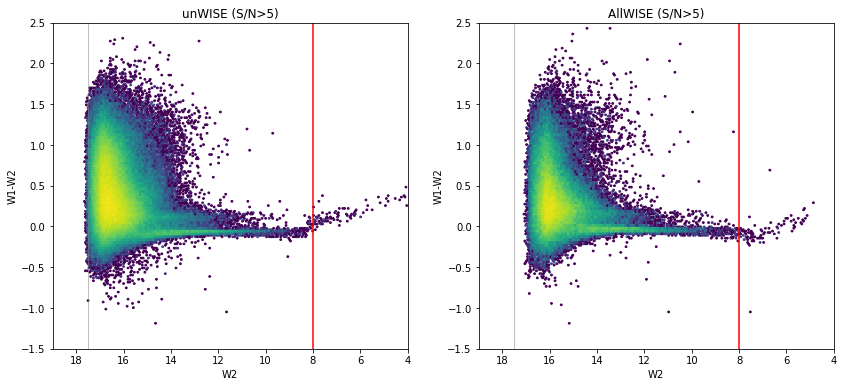

In [23]:
# set plotting ranges
xlims = (19,4)
ylims = (-1.5,2.5)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

# first panel
x = df['w2']
y = df['w1_w2']
ax1.hexbin(x,y,bins='log',gridsize=200,extent=(xlims[0],xlims[1],ylims[0],ylims[1]),cmap=plt.cm.viridis, mincnt=1)
ax1.set_xlabel('W2')
ax1.set_ylabel('W1-W2')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_title('unWISE (S/N>5)')

#Saturation at around 8 mag (would give unusual colors/mags)
ax1.axvline(x=8,color='Red')
ax1.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

# second panel
xx = df_all['w2']
yy = w1_w2_all
ax2.hexbin(xx,yy,bins='log',gridsize=200,extent=(xlims[0],xlims[1],ylims[0],ylims[1]),cmap=plt.cm.viridis, mincnt=1)
ax2.set_xlabel('W2')
ax2.set_ylabel('W1-W2')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_title('AllWISE (S/N>5)')

#Saturation at around 8 mag (would give unusual colors/mags)
ax2.axvline(x=8,color='Red')
ax2.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

plt.show()

### NOTES:
The Color-Magnitude distributions of the unWISE and AllWISE datasets show that an obvious difference in sensitivity, with unWISE reaching about ~0.5 magnitudes deeper in `W2`. Their respective detection limits are around `W2>17.5` for unWISE (vertical grey line), and around `W2>17` for AllWISE. In addition, there are slight differences between the two bivariate distributions. For instance, the upper-right envelope displays a different shape. Users of this notebook can explore what the origin of the differences might be.

## Investigate cases with marginal S/N ratios in AllWISE

In [24]:
query = """
        SELECT w1mpro as w1, w2mpro as w2, w1snr, w2snr,
               ra, dec, glon, glat, random_id, ph_qual
        FROM allwise.source
        WHERE ((w1snr<5 or w2snr<5) and glat>50 and glat<60 and random_id > 20 and random_id < 21)
        LIMIT 500000"""

In [25]:
try:
    result_losnr = qc.query(sql=query,timeout=600) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

CPU times: user 198 ms, sys: 85 ms, total: 283 ms
Wall time: 9.4 s


In [26]:
# Convert the result to a Pandas Dataframe
df_losnr = convert(result_losnr,'pandas')   #,na_values=('NaN','Infinity'))

In [27]:
# AllWISE
snr35_w1 = (df_losnr['w1snr']>3)&(df_losnr['w1snr']<5) # for testing below
snr35_w2 = (df_losnr['w2snr']>3)&(df_losnr['w2snr']<5)

w1_w2_losnr = df_losnr['w1']-df_losnr['w2']

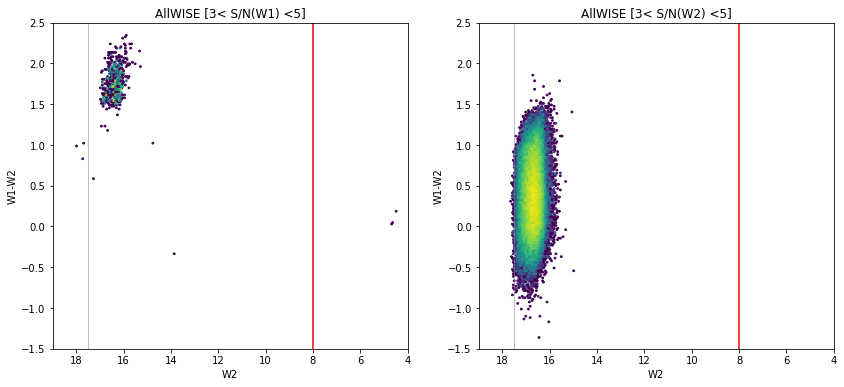

In [28]:
#define a 2-panel figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))

#first panel
x = df_losnr['w2'][snr35_w1]
y = w1_w2_losnr[snr35_w1]
ax1.hexbin(x,y,bins='log',gridsize=200,extent=(xlims[0],xlims[1],ylims[0],ylims[1]),cmap=plt.cm.viridis, mincnt=1)
ax1.set_xlabel('W2')
ax1.set_ylabel('W1-W2')
ax1.set_xlim(xlims)
ax1.set_ylim(ylims)
ax1.set_title('AllWISE [3< S/N(W1) <5]')

#Saturation at around 8 mag (would give unusual colors/mags)
ax1.axvline(x=8,color='Red')
ax1.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

#second panel
xx = df_losnr['w2'][snr35_w2]
yy = w1_w2_losnr[snr35_w2]
ax2.hexbin(xx,yy,bins='log',gridsize=200,extent=(xlims[0],xlims[1],ylims[0],ylims[1]),cmap=plt.cm.viridis, mincnt=1)
ax2.set_xlabel('W2')
ax2.set_ylabel('W1-W2')
ax2.set_xlim(xlims)
ax2.set_ylim(ylims)
ax2.set_title('AllWISE [3< S/N(W2) <5]')

#Saturation at around 8 mag (would give unusual colors/mags)
ax2.axvline(x=8,color='Red')
ax2.axvline(x=17.5,color='Gray',lw=1,alpha=0.5)

plt.show()

<a class="anchor" id="chapter4"></a>
# Chapter 4 -  Plot location of query results in Galactic Coordinates 

Below, we check the final sky location of the query results for unWISE and AllWISE, in Galactic coordinates. In the queries, we chose the following constraints: `glat>50 and glat<60` as well as `random_id > 20 and random_id < 21`. The former contraints are cuts in Galactic latitude, and the latter select 1 percent of the sample randomly distributed (between index 20-21, an arbitrary choice kept fixed for repeatability).

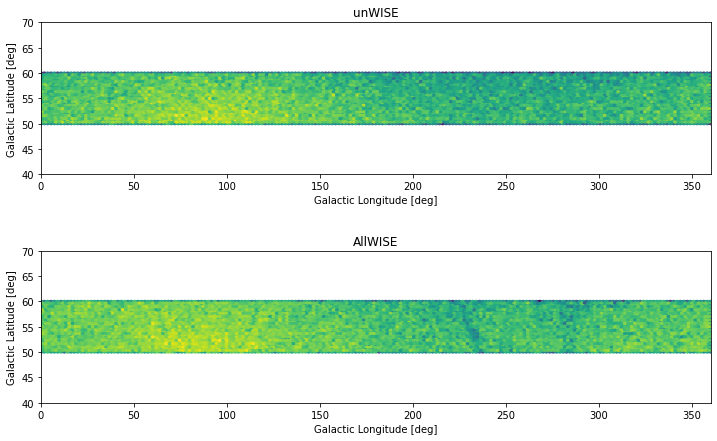

In [29]:
#define a 2-panel figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,7))

#first panel
x = df['glon']
y = df['glat']
ax1.hexbin(x,y,bins='log', cmap=plt.cm.viridis, mincnt=1,gridsize=(200,15))
ax1.set_xlabel('Galactic Longitude [deg]')
ax1.set_ylabel('Galactic Latitude [deg]')
ax1.set_xlim((0,360))
ax1.set_ylim((40,70))
title = ax1.set_title('unWISE')

#second panel
xx = df_all['glon']
yy = df_all['glat']
ax2.hexbin(xx,yy,bins='log', cmap=plt.cm.viridis, mincnt=1,gridsize=(200,15))
ax2.set_xlabel('Galactic Longitude [deg]')
ax2.set_ylabel('Galactic Latitude [deg]')
ax2.set_xlim((0,360))
ax2.set_ylim((40,70))
title = ax2.set_title('AllWISE')

fig.subplots_adjust(hspace=0.5)

### Repeat the galactic position plots but showing the distribution of objects with low S/N in AllWISE to check for any patterns.

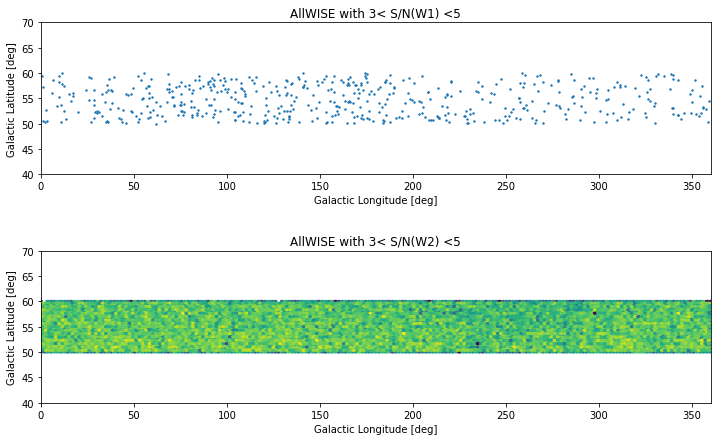

In [30]:
#define a 2-panel figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,7))

#first panel
x = df_losnr['glon'][snr35_w1]
y = df_losnr['glat'][snr35_w1]
ax1.scatter(x,y,s=2)
ax1.set_xlabel('Galactic Longitude [deg]')
ax1.set_ylabel('Galactic Latitude [deg]')
ax1.set_xlim((0,360))
ax1.set_ylim((40,70))
title = ax1.set_title('AllWISE with 3< S/N(W1) <5')

#second panel
xx = df_losnr['glon'][snr35_w2]
yy = df_losnr['glat'][snr35_w2]
ax2.hexbin(xx,yy,bins='log', cmap=plt.cm.viridis, mincnt=1,gridsize=(200,15))
ax2.set_xlabel('Galactic Longitude [deg]')
ax2.set_ylabel('Galactic Latitude [deg]')
ax2.set_xlim((0,360))
ax2.set_ylim((40,70))
title = ax2.set_title('AllWISE with 3< S/N(W2) <5')

fig.subplots_adjust(hspace=0.5)

From visual inspection, the sources with low S/N in the AllWISE *W1* (top panel) or *W2* (bottom panel) photometry are uniformly distributed on the area that we queried. This is unlike the sources with valid detections (S/N>5), which show enhanced number density around `70 < glon < 100` due to actual Galactic structure.

<a class="anchor" id="resources"></a>
# Resources and references

Kurcz et al (2016): *Towards automatic classification of all WISE sources*, Astronomy & Astrophysics, 592, A25: https://ui.adsabs.harvard.edu/abs/2016A%26A...592A..25K

Schlafly et al (2019): *The unWISE Catalog: Two Billion Infrared Sources from Five Years of WISE Imaging*, Astrophysical Journal Supplement, 240, 30: https://ui.adsabs.harvard.edu/abs/2019ApJS..240...30S

Wright et al (2010): *The Wide-field Infrared Survey Explorer (WISE): Mission Description and Initial On-orbit Performance*, Astronomical Journal, 140, 1868: https://ui.adsabs.harvard.edu/abs/2010AJ....140.1868W